---
title: Running dFBA
format:
  html: 
    toc: true
    warning: false
    error: false
code-line-numbers: true
---

Dynamic Flux Balance Analysis (dFBA) can be used through *simulib*. The currently supported implementation uses the tool developed by [Tourigny et al.](https://gitlab.com/davidtourigny/dynamic-fba/) for this purpose. The `DynamicFBASimulator` class encompasses the workflow to convert *simulib* inputs into a dFBA problem capable of returning appropriate outputs.

The most important method in the class is `simulate` which takes `DFBASimulationInput` and `DFBASimulationOptions` objects and returns a `DFBASimulationResult` instance containing results. 

We have thus far create steady-state and dynamic model objects which we will use for the dFBA simulation.

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, "/app/src")

from yaml import safe_load as yaml_load
from cobra.io.web.load import load_model
from simulib.entities.steadystate import SteadyStateSimulationInput
from simulib.entities.dynamic import DynamicModelInput

with open("/app/resources/models/toy_scere_glc_growth.yaml", "r") as f:
    ds_input = DynamicModelInput.from_dict(yaml_load(f))
ss_input = SteadyStateSimulationInput(model=load_model("iND750"), added_reactions=[], reaction_constraints=[])

In [2]:
from simulib.methods.dynamic.dfba.entities import DFBASimulationInput

dfba_input = DFBASimulationInput(steady_state_input=ss_input, dynamic_input=ds_input)
display(dfba_input)

DFBASimulationInput(steady_state_input=SteadyStateSimulationInput(model=<Model iND750 at 0x7f0c1ae865f0>, added_reactions=[], reaction_constraints=[]), dynamic_input=DynamicModelInput(name='Toy S. cerevisae Glucose Growth Model', description='Simulib-ready toy model', odes=[ODE(variable='Volume', rhs_expression=D, initial_condition=0.500000000000000, annotations={}, simulation_properties=ODESimulationProperties(abs_tolerance=None), metabolite_id=None), ODE(variable='Biomass', rhs_expression=BIOMASS_SC4_bal*Biomass - Biomass*D/Volume, initial_condition=0.0500000000000000, annotations={}, simulation_properties=ODESimulationProperties(abs_tolerance=None), metabolite_id=None), ODE(variable='Glucose', rhs_expression=Biomass*EX_glc__D_e + D*(Gin - Glucose)/Volume, initial_condition=5.00000000000000, annotations={}, simulation_properties=ODESimulationProperties(abs_tolerance=None), metabolite_id=None), ODE(variable='Xylose', rhs_expression=Biomass*EX_xyl__D_e + D*(-Xylose + Zin)/Volume, initi

DFBA simulation options can be pulled from the dynamic model input and overriden in the `DFBASimulationOptions` class



In [3]:
from simulib.methods.dynamic.dfba.entities import DFBASimulationOptions

display(ds_input.simulation_properties)

simulation_options_dict = ds_input.simulation_properties.copy()
simulation_options_dict.update(dict(
        output_fluxes=list(ds_input.exchange_variables)
))

simulation_options = DFBASimulationOptions(**simulation_options_dict)
display(simulation_options)

{'algorithm': 'Harwood',
 'tout': 0.01,
 'tstart': 0,
 'tstop': 20,
 'rel_tolerance': '1e-6',
 'default_abs_tolerance': '1e-6',
 'display': 'none'}

DFBASimulationOptions(tstart=0.0, tstop=20.0, tout=0.01, output_fluxes=['EX_o2_e', 'EX_etoh_e', 'EX_glc__D_e', 'EX_xyl__D_e', 'BIOMASS_SC4_bal'], rel_tolerance=1e-06, default_abs_tolerance=1e-06, display=<DFBADisplay.NONE: 'none'>, algorithm=<DFBAAlgorithm.HARWOOD: 'Harwood'>, ode_method=<DFBAODEMethod.BDF: 'BDF'>, sunmatrix=<DFBASunmatrix.DENSE: 'dense'>, sunlinsolver='dense')

Simulations can be run with `DynamicFBASimulator`

In [4]:
from simulib.methods.dynamic.dfba.simulator import DynamicFBASimulator

simulator = DynamicFBASimulator()
result = simulator.simulate(dfba_input, simulation_options)

abs_tolerance set to [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06]
algorithm set to Harwood
display set to none
ode method set to BDF
rel_tolerance set to 1e-06
sunmatrix set to dense
sunlinsolver set to dense

Total simulation time was 3.76366 seconds



<Axes: xlabel='time'>

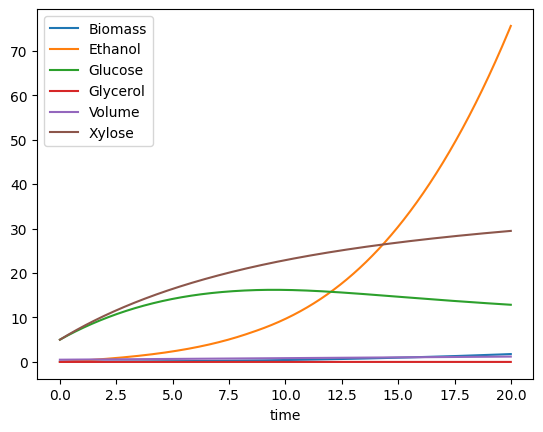

In [5]:
result.concentrations.plot(x="time")

<Axes: xlabel='time'>

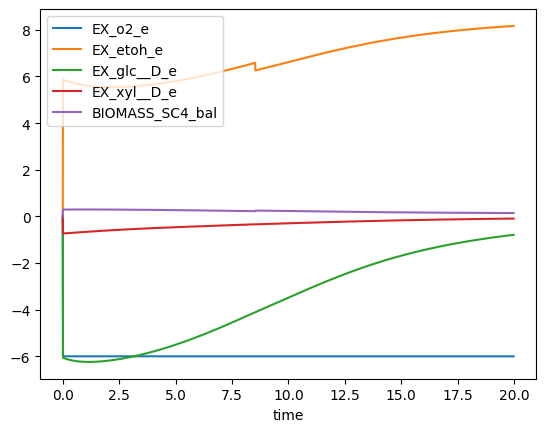

In [6]:
result.trajectories.plot(x="time")

The same simulation can be done with a different algorithm - DIRECT

In [ ]:
from simulib.methods.dynamic.dfba.entities import DFBAAlgorithm, DFBAODEMethod

simulation_options.algorithm = DFBAAlgorithm.DIRECT
simulation_options.ode_method = DFBAODEMethod.BDF

result = simulator.simulate(dfba_input, simulation_options)

<Axes: xlabel='time'>

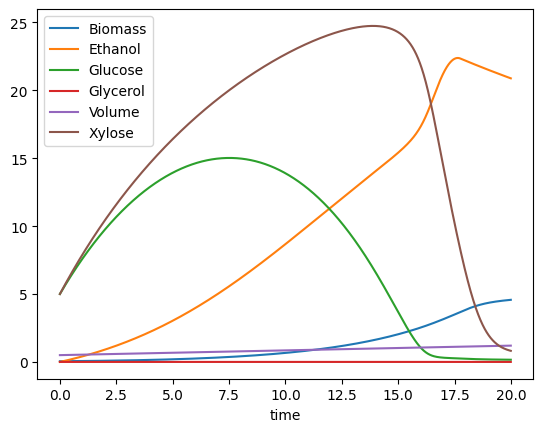

In [8]:
result.concentrations.plot(x="time")

<Axes: xlabel='time'>

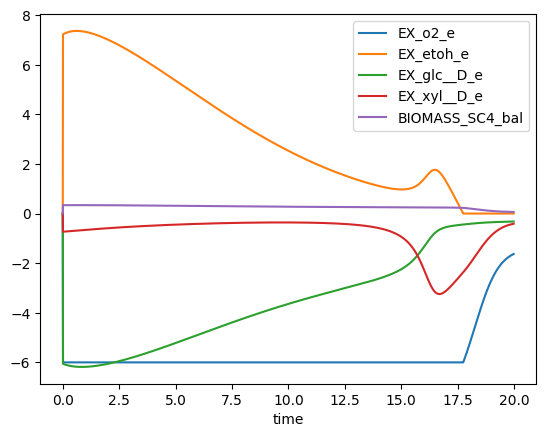

In [9]:
result.trajectories.plot(x="time")